<a href="https://colab.research.google.com/github/Valepf/Clasificador_FakeNews/blob/main/Clasificador_fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**PROYECTO FINAL: ELEMENTOS DE APRENDIZAJE DE MÁQUINA Y BIG DATA**

#**Detección de Noticias Falsas**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBC
import re
import string


#**importo Dataset**

In [ ]:
true_news = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectFN/data/true.csv")
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_news = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectFN/data/fake.csv")
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


#**Insertar una columna 'clase' como característica objetivo**

In [ ]:
fake_news["clase"] = 0
true_news ["clase"] = 1

In [ ]:
fake_news.shape, true_news.shape

((23481, 5), (21417, 5))

**Creo conjuntos de datos para pruebas manuales:**



1.   Selecciono las últimas 10 filas de los conjuntos de datos fake_news y true_news para realizar pruebas manuales.
2.   Almaceno estas filas en los nuevos conjuntos de datos df_fake_manual_testing y df_true_manual_testing.
3.   Elimino las últimas 10 filas de los conjuntos de datos originales df_fake y df_true utilizando un bucle.




In [ ]:
fake_news_manual_testing = fake_news.tail(10)
for i in range(23480, 23470, -1):
    fake_news.drop([i], axis=0, inplace=True)

true_news_manual_testing = true_news.tail(10)
for i in range(21416, 21406, -1):
   true_news.drop([i], axis=0, inplace=True)


In [ ]:
fake_news.shape, true_news.shape

((23471, 5), (21407, 5))

In [ ]:
fake_news_manual_testing ["class"] = 0
true_news_manual_testing["class"] = 1

<ipython-input-56-81a0d3281d60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news_manual_testing ["class"] = 0
<ipython-input-56-81a0d3281d60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_news_manual_testing["class"] = 1


In [ ]:
fake_news_manual_testing.head(10)

,title,text,subject,date,clase,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0,0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0,0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0,0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0,0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0,0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0,0


In [ ]:
true_news_manual_testing.head(10)

,title,text,subject,date,clase,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1,1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1,1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1,1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1,1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1,1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1,1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1,1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1,1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1,1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1,1


este código crea un nuevo conjunto de datos combinando las pruebas manuales de noticias falsas y verdaderas, y luego guarda ese conjunto de datos combinado en un archivo CSV llamado "manual_testing.csv"

In [ ]:
df_manual_testing = pd.concat([fake_news_manual_testing,true_news_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

#**Concateno los DataFrames**

In [ ]:
df_merge = pd.concat([fake_news, true_news], axis =0 )
df_merge.head(10)

,title,text,subject,date,clase
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
df_merge.columns

#**Elimino columnas que no son necesarias**

In [ ]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [ ]:
df.isnull().sum()

#**Reorganizo aleatoriamente las filas del DataFrame para para evitar sesgos en el entrenamiento**

In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.head()

In [ ]:
# restablecemos el índice del DataFrame y elimino la columna "index"
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['text', 'clase'], dtype='object')

In [ ]:
df.head()

,text,clase
0,madrid reuters spanish police on friday de...,1
1,new york reuters a campaign advisor and lo...,1
2,dozens of supporters of us president donald tr...,0
3,,0
4,manila reuters philippine president rodrig...,1


#**Función para procesar los textos**
 Esta funcion realiza una limpieza exhaustiva del texto, eliminando elementos no deseados como corchetes, caracteres no alfanuméricos, URLs, etiquetas HTML, signos de puntuación, saltos de línea y palabras que contienen números.

In [ ]:
def procesar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar contenido entre corchetes
    texto = re.sub('\[.*?\]', '', texto)

    # Eliminar caracteres no alfanuméricos
    texto = re.sub("\\W", " ", texto)

    # Eliminar URLs
    texto = re.sub('https?://\S+|www\.\S+', '', texto)

    # Eliminar etiquetas HTML
    texto = re.sub('<.*?>+', '', texto)

    # Eliminar signos de puntuación
    texto = re.sub('[%s]' % re.escape(string.punctuation), '', texto)

    # Eliminar saltos de línea
    texto = re.sub('\n', '', texto)

    # Eliminar palabras que contienen números
    texto = re.sub('\w*\d\w*', '', texto)

    return texto


In [ ]:
df["text"] = df["text"].apply(procesar_texto)

#**Variables dependientes e independientes**

In [ ]:
x = df["text"]
y = df["clase"]

#**Divido en conjunto de Entrenamiento (Training Set)y conjunto de Pruebas (Testing Set)**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#**Convertir texto a vectores**

Empleo la funcion TF-IDF para convertir el texto de entrenamiento (x_train) y prueba (x_test) en matrices numéricas que pueden ser utilizadas como entrada para algoritmos de aprendizaje automático

In [ ]:
# Crear una instancia de TfidfVectorizer
vectorization = TfidfVectorizer()

# Aplicar la vectorización al conjunto de entrenamiento
xv_train = vectorization.fit_transform(x_train)

# Aplicar la vectorización al conjunto de prueba
xv_test = vectorization.transform(x_test)


#**Regresión Logística**

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.9892156862745098

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5815
           1       0.99      0.99      0.99      5405

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [ ]:
# Obtener la matriz de confusión
cm_lr = confusion_matrix(y_test, pred_lr)
print("Matriz de Confusión - Regresión Logística:")
print(cm_lr)

Matriz de Confusión - Regresión Logística:
[[5739   76]
 [  45 5360]]


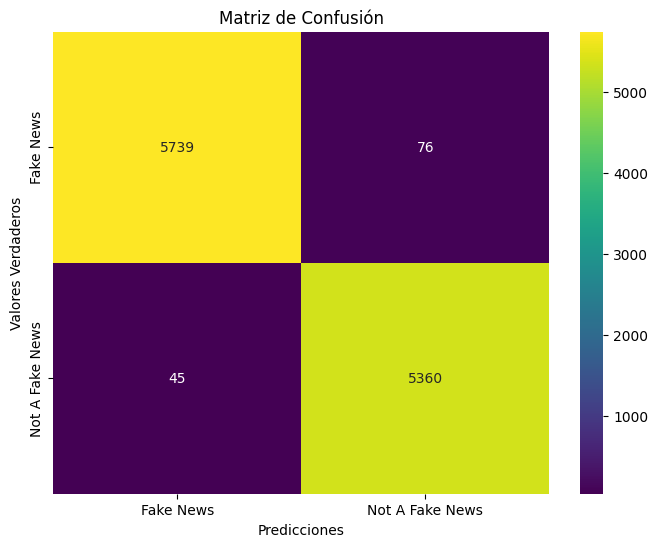

In [ ]:
cm = confusion_matrix(y_test, pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=["Fake News", "Not A Fake News"], yticklabels=["Fake News", "Not A Fake News"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()


#**Decision Tree**

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.9954545454545455

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5815
           1       1.00      1.00      1.00      5405

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [ ]:
# Obtener la matriz de confusión
cm_dt = confusion_matrix(y_test, pred_dt)
print("Matriz de Confusión - Árbol de Decisión:")
print(cm_dt)

Matriz de Confusión - Árbol de Decisión:
[[5790   25]
 [  25 5380]]


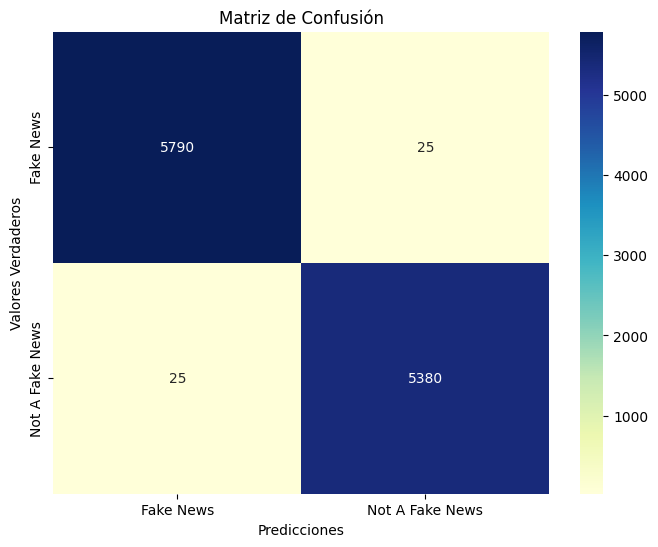

In [ ]:
cm = confusion_matrix(y_test, pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["Fake News", "Not A Fake News"], yticklabels=["Fake News", "Not A Fake News"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

#**Gradient Boosting Classifier**

In [ ]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)


GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gbc = GBC.predict(xv_test)

In [ ]:
GBC.score(xv_test, y_test)

0.9950980392156863

In [ ]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5815
           1       0.99      1.00      0.99      5405

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [ ]:
# Obtener la matriz de confusión
cm_gbc = confusion_matrix(y_test, pred_gbc)
print("Matriz de Confusión - Gradient Boosting Classifier:")
print(cm_gbc)

Matriz de Confusión - Gradient Boosting Classifier:
[[5772   43]
 [  12 5393]]


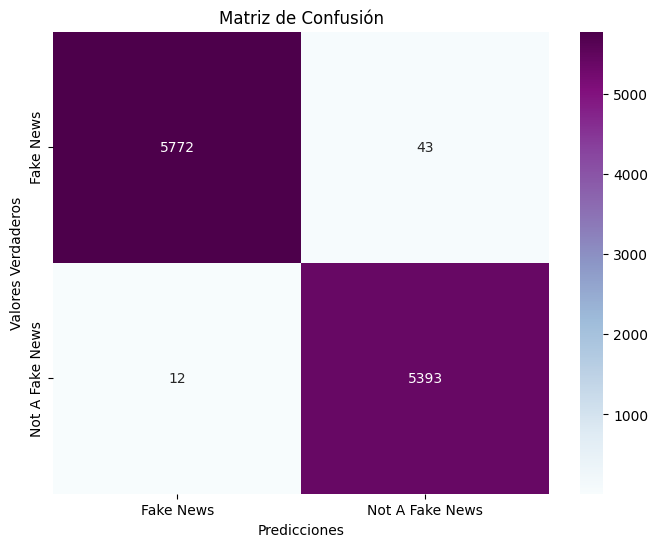

In [ ]:
cm = confusion_matrix(y_test, pred_gbc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu", xticklabels=["Fake News", "Not A Fake News"], yticklabels=["Fake News", "Not A Fake News"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

#**Random Forest Classifier**

In [ ]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test, y_test)

0.9907308377896613

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5815
           1       0.99      0.99      0.99      5405

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [ ]:
# Obtener la matriz de confusión
cm_rfc = confusion_matrix(y_test, pred_rfc)

# Imprimir la matriz de confusión
print("Matriz de Confusión - Random Forest Classifier:")
print(cm_rfc)

Matriz de Confusión - Random Forest Classifier:
[[5764   51]
 [  53 5352]]


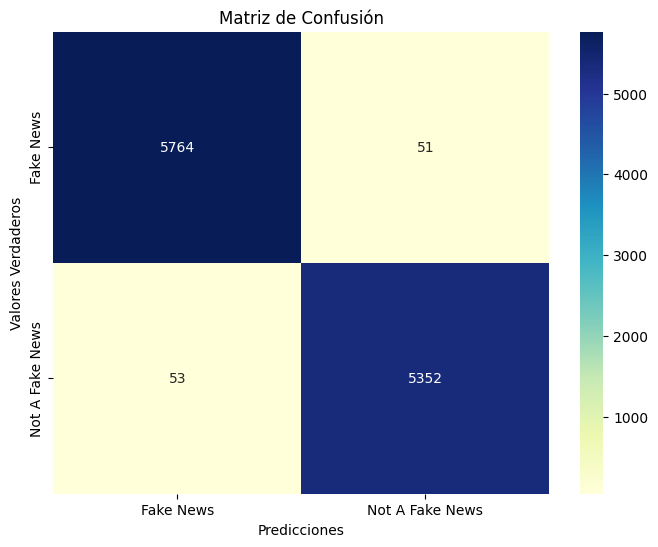

In [ ]:
cm = confusion_matrix(y_test, pred_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["Fake News", "Not A Fake News"], yticklabels=["Fake News", "Not A Fake News"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

In [ ]:
colors = px.colors.qualitative.Set3
fig = px.bar(x=model_names, y=accuracies_percentage, text=accuracies_percentage, color=model_names,
             color_discrete_sequence=colors, labels={'y': 'Precisión (%)'},
             title='Comparación de Precisión entre Modelos',
             height=500)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.show()



#**Prueba del Modelo**

Se emplea la función, **output_lable**, que toma un número como entrada y devuelve una etiqueta correspondiente según las siguientes reglas:

* Si la entrada n es igual a 0, la función devuelve "Fake News".
* Si la entrada n es igual a 1, la función devuelve "Not A Fake News".

La función **manual_testing** Toma un texto de noticia como entrada, lo procesa utilizando una función llamada **procesar_texto** y luego utiliza modelos de clasificación (LR, DT, GBC, RFC) previamente entrenados para predecir si la noticia es falsa o no.

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(procesar_texto)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)


    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                                       output_lable(pred_DT[0]),
                                                                                                       output_lable(pred_GBC[0]),
                                                                                                       output_lable(pred_RFC[0])))


In [ ]:
df["text"] = df["text"].apply(procesar_texto)

In [ ]:
news = str(input())
manual_testing(news)

GENEVA (Reuters) - North Korea and the United .


LR Prediction: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction: Not A Fake News


In [ ]:
news = str(input())
manual_testing(news)

In [ ]:
news = str(input())
manual_testing(news)